In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import warnings
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

from google.colab import files

warnings.filterwarnings("ignore")

In [3]:
dataset_link = "/content/drive/MyDrive/Google Colab/datasets/sharktankindia_data_edited.csv"

In [4]:
dataset = pd.read_csv(dataset_link)
dataset.columns = [x.lower().replace(" ","_") for x in dataset.columns]
dataset.set_index(dataset.pitch_number, inplace = True)
dataset.drop("pitch_number",inplace = True, axis =1)

In [5]:
condition1 = lambda x: "Service" if x == "Professional Service" else x
condition2 = lambda y: float(y.replace("%","")) 
dataset.category = dataset.category.apply(condition1)
dataset.equity = dataset.equity.apply(condition2)


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 117
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   episode_number                    117 non-null    int64  
 1   brand                             117 non-null    object 
 2   idea                              117 non-null    object 
 3   category                          117 non-null    object 
 4   investment_amount_(in_lakhs_inr)  117 non-null    int64  
 5   debt_(in_lakhs_inr)               117 non-null    int64  
 6   equity                            117 non-null    float64
 7   anupam                            117 non-null    object 
 8   ashneer                           117 non-null    object 
 9   namita                            117 non-null    object 
 10  aman                              117 non-null    object 
 11  peyush                            117 non-null    object 
 12  vineeta 

In [7]:
dataset.head(10)

,episode_number,brand,idea,category,investment_amount_(in_lakhs_inr),debt_(in_lakhs_inr),equity,anupam,ashneer,namita,aman,peyush,vineeta,ghazal,season
pitch_number,,,,,,,,,,,,,,,
1,1,BluePine Industries,Frozen Momos,Food,75,0,18.00,N,Y,N,Y,N,Y,N,1
2,1,Booz scooters,Renting e-bike for mobility in private spaces,Automobile,40,0,50.00,N,Y,N,N,N,Y,N,1
3,1,Heart up my Sleeves,Detachable Sleeves,Clothing,25,0,30.00,Y,N,N,N,N,Y,N,1
4,2,Tagz Foods,Healthy Potato Chips,Food,70,0,2.75,N,Y,N,N,N,N,N,1
5,2,Head and Heart,Brain Development Course,Service,0,0,0.00,N,N,N,N,N,N,N,1
6,2,Agro tourism,Tourism,Service,0,0,0.00,N,N,N,N,N,N,N,1
7,3,Qzense Labs,Food Freshness Detector,Technology,0,0,0.00,N,N,N,N,N,N,N,1
8,3,Peeschute,Disposable Urine Bag,Health,75,0,6.00,N,N,N,Y,N,N,N,1
9,3,NOCD,Energy Drink,Food,20,30,15.00,N,N,N,N,N,Y,N,1


In [8]:
#Total unique categories
dataset.category.unique()

array(['Food', 'Automobile', 'Clothing', 'Service', 'Technology',
       'Health', 'Consumer', 'Other'], dtype=object)

In [9]:
#The Sharks themselves

sharksIndia = ["anupam","namita",'ashneer',"aman","peyush","vineeta",'ghazal']


### Dataset Generation Section
---
Section only for dataset creation 


In [10]:
dataset_groupby_category = dataset.groupby('category')

In [11]:
condition_nays_only = (dataset.anupam == "N") & (dataset.namita =="N") & (dataset.ashneer =="N") & (dataset.aman =="N") & (dataset.peyush =="N") & (dataset.vineeta =="N") & (dataset.ghazal =="N")
condition_yays = (dataset.anupam == "Y") | (dataset.namita =="Y") | (dataset.ashneer =="Y") | (dataset.aman =="Y") | (dataset.peyush =="Y") | (dataset.vineeta =="Y") | (dataset.ghazal =="Y")

In [12]:
#(52, 15)
dataset_nays = dataset.loc[condition_nays_only]

#(65, 15)
dataset_maybe_yays = dataset.loc[condition_yays].sort_values(by = "equity",ascending = False).head(3)

In [13]:
#created dataset based on shark yays and nays

def count_yays(row,sharksIndia):
  yay_nay = {"yay":[],"nay":[]}
  yay = nay = 0
  for i in range(0,117):
    for name in sharksIndia:
      value = row[name].iloc[i]
      if value == "Y":
        yay = yay+1
      else:
        nay = nay+1
    yay_nay["yay"].append(yay)
    yay_nay['nay'].append(nay)
    yay = nay = 0
  return yay_nay

temp = count_yays(dataset, sharksIndia)
dataset['yay'] = temp['yay']
dataset['nay'] = temp['nay']

In [14]:
# no significant data based on debt
print("debt:", dataset.loc[dataset["debt_(in_lakhs_inr)"]> 0].shape)

#yay<2
print("yay < 2:", dataset.loc[dataset.yay<2].shape)
#dataset.loc[dataset.yay<2].head(3)

#yay = 1
print("yay = 1:", dataset.loc[dataset.yay==1].shape)
#dataset.loc[dataset.yay==1]

#yay = 0
print("yay = 0:", dataset.loc[dataset.yay==0].shape)
#dataset.loc[dataset.yay==0]

# yays >3
print("yay > 3:", dataset.loc[dataset.yay>3].shape)
dataset.loc[dataset.yay>3].head(7)


debt: (8, 17)
yay < 2: (74, 17)
yay = 1: (22, 17)
yay = 0: (52, 17)
yay > 3: (9, 17)


,episode_number,brand,idea,category,investment_amount_(in_lakhs_inr),debt_(in_lakhs_inr),equity,anupam,ashneer,namita,aman,peyush,vineeta,ghazal,season,yay,nay
pitch_number,,,,,,,,,,,,,,,,,
16,6,Skippi Pops,Ice-Pops,Food,10,0,15.0,Y,Y,Y,Y,N,Y,N,1,5,2
39,13,The Yarn Bazaar,Yarn-Trading App,Technology,10,0,10.0,Y,Y,N,Y,Y,N,N,1,4,3
50,17,Find Your Kicks India,Sneaker Resale,Clothing,50,0,25.0,Y,Y,Y,Y,Y,N,N,1,5,2
59,19,WeSTOCK,Livestock health monitoring AI,Technology,60,0,10.0,N,Y,Y,Y,Y,N,N,1,4,3
64,20,IN A CAN,Can Cocktails,Food,10,0,10.0,Y,Y,Y,Y,Y,N,N,1,5,2
80,25,Sunfox Technologies,Portable ECG Device,Health,10,0,6.0,Y,N,Y,N,Y,Y,Y,1,5,2
86,27,Watt Technovations,Ventilated PPE Kits,Health,10,0,4.0,Y,N,Y,N,Y,N,Y,1,4,3


In [15]:
dataset.head(5)

,episode_number,brand,idea,category,investment_amount_(in_lakhs_inr),debt_(in_lakhs_inr),equity,anupam,ashneer,namita,aman,peyush,vineeta,ghazal,season,yay,nay
pitch_number,,,,,,,,,,,,,,,,,
1,1,BluePine Industries,Frozen Momos,Food,75,0,18.00,N,Y,N,Y,N,Y,N,1,3,4
2,1,Booz scooters,Renting e-bike for mobility in private spaces,Automobile,40,0,50.00,N,Y,N,N,N,Y,N,1,2,5
3,1,Heart up my Sleeves,Detachable Sleeves,Clothing,25,0,30.00,Y,N,N,N,N,Y,N,1,2,5
4,2,Tagz Foods,Healthy Potato Chips,Food,70,0,2.75,N,Y,N,N,N,N,N,1,1,6
5,2,Head and Heart,Brain Development Course,Service,0,0,0.00,N,N,N,N,N,N,N,1,0,7


In [16]:
#Divide the Data as per the Sharks
anupam = dataset.loc[dataset.anupam == "Y"]
ashneer = dataset.loc[dataset.ashneer == "Y"]
namita = dataset.loc[dataset.namita == "Y"]
aman = dataset.loc[dataset.aman == "Y"]
peyush = dataset.loc[dataset.peyush == "Y"]
vineeta = dataset.loc[dataset.vineeta == "Y"]
ghazal = dataset.loc[dataset.ghazal == "Y"]


In [17]:
#Category value counts data for plotting the line polar plot using plotly
anupamData = anupam.category.value_counts()
ashneerData = ashneer.category.value_counts()
namitaData = namita.category.value_counts()
amanData = aman.category.value_counts()
peyushData = peyush.category.value_counts()
vineetaData = vineeta.category.value_counts()
ghazalData = ghazal.category.value_counts()

dfSharkCategoryCounts = pd.concat([anupamData, ashneerData, namitaData, amanData, peyushData, vineetaData, ghazalData], keys = sharksIndia)

In [18]:
for key in sharksIndia:
  total_bids = dfSharkCategoryCounts.loc[key].values.sum()
  print(key.title(), "Total Bids: "+ str(total_bids))

#since the investing bids by the sharks are eratic, it is better to normalize the category bids using a min-max scaler

Anupam Total Bids: 24
Namita Total Bids: 21
Ashneer Total Bids: 22
Aman Total Bids: 28
Peyush Total Bids: 27
Vineeta Total Bids: 15
Ghazal Total Bids: 7


In [19]:
dfSharkCategoryCounts.loc["vineeta"]

Food          8
Clothing      2
Health        2
Automobile    1
Consumer      1
Technology    1
Name: category, dtype: int64

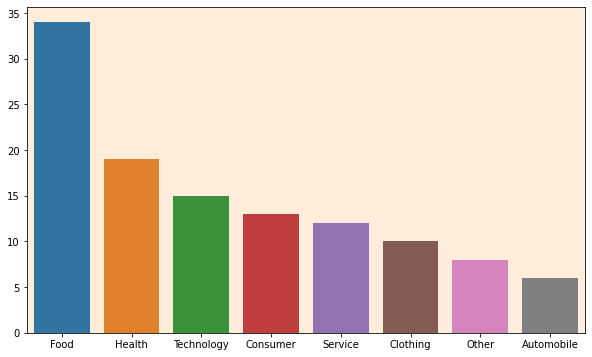

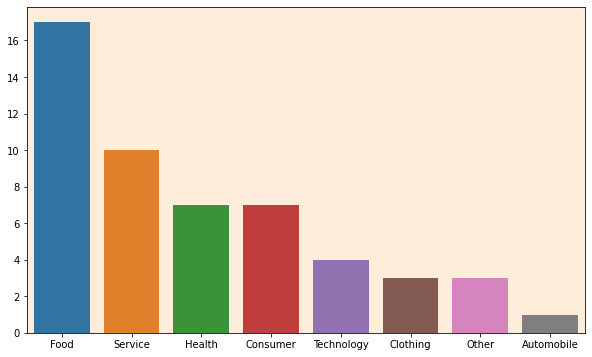

In [27]:
figure = plt.figure(figsize = (10,6))
#plt.style.use("ggplot2")
ax = sb.countplot(dataset.category,order = dataset.category.value_counts().sort_values(ascending = False).index);
ax.set(xlabel = None, ylabel = None,)
ax.tick_params(axis = "x",color = "black")
ax.set_facecolor("#FFEDDB")
figure.savefig("categories_plot.png")


figure = plt.figure(figsize = (10,6))
#plt.style.use("dark_background")
ax= sb.countplot(dataset_nays.category, order = dataset_nays.category.value_counts().sort_values(ascending = False).index)
ax.set(xlabel = None, ylabel = None)
ax.tick_params(axis = "x",color = "black")
ax.set_facecolor("#FFEDDB")
figure.savefig("categories_plot_nays.png")

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [22]:
#normalize to each shark data
def normalData(key):
  data = dfSharkCategoryCounts.loc[key]
  reshapedData = np.array(data.values).reshape(-1,1)
  normalizedData = min_max.fit_transform(reshapedData)
  df = pd.DataFrame({"value": data.values,
                     "category": data.index,
                     'normalized_shark_data': normalizedData.flatten()})
  return df

def normalDataset():
  data = dfSharkCategoryCounts
  reshapedData = np.array(data.values).reshape(-1,1)
  normalizedData = min_max.fit_transform(reshapedData)
  df = pd.DataFrame({"normal_value_total": normalizedData.flatten()})
  return df


In [23]:
dfNormalAman = normalData("aman")
dfNormalAnupam = normalData("anupam")
dfNormalPeyush = normalData("peyush")
dfNormalVineeta = normalData("vineeta")
dfNormalAshneer = normalData("ashneer")
dfNormalNamita = normalData("namita")
dfNormalGhazal  = normalData("ghazal")
sharksIndia = ["anupam","namita",'ashneer',"aman","peyush","vineeta",'ghazal']
temp = [dfNormalAnupam,dfNormalNamita, dfNormalAshneer, dfNormalAman, dfNormalPeyush, dfNormalVineeta, dfNormalGhazal]
# alas the final data to be plotted
finalPlotData = pd.concat(temp, keys = sharksIndia)

In [24]:
#plotting function normalized values
def plot_line_polar_normalized(name):
  data = finalPlotData.loc[name]
  figure = px.line_polar(r = data.normalized, theta = data.category, line_close = True,)
  figure.update_layout(
    plot_bgcolor = "LightSteelBlue",
    font ={'color': "#000", 'family':'Sans', "size":15},
    margin=dict(l=20, r=20, t=50, b=50),
    width = 300,
    height = 300
  )
  return figure


#plotting function counts only
def plot_line_polar_count(name):

  data = finalPlotData.loc[name]

  #title of the diagram
  total_pitch_bids = "total pitch bids: "+ str(data.value.sum())
  name  = name.title()
  title = total_pitch_bids

  figure = px.line_polar(r = data.value, range_r=[0,10], theta = data.category.apply(lambda x : x.upper()), line_close = True)
  figure.update_layout(
    font ={'color': "#000", 'family':'Sans:Product', "size":24,},
    margin=dict(l=180, r=180, t=120, b=100),
    paper_bgcolor= "#FFEDDB",
    width = 1200,
    height = 1200,
    title_text = title,
    title_x = 0.05,
    title_y = 0.95
  )
  figure.update_polars(bgcolor = "#E3B7A0")
  return figure

In [25]:
for key in sharksIndia:
  data = plot_line_polar_count(key)
  data.show()